In [2]:
import json

In [3]:
with open('./example-argumentation-framework.json', 'r') as f:
    data = json.load(f)

In [4]:
data

{'Arguments': {'0': 'We should go to the cinema.',
  '1': 'We should go to the gym.',
  '2': 'The gym is better for the health than the cinema.',
  '3': 'We have no time for evening activities, since there is an exam coming up.',
  '4': 'The exam is in a few weeks.',
  '5': 'We have no money for cinema or gym.',
  '6': 'We just got our sallaries.'},
 'Attack Relations': [['0', '1'],
  ['1', '0'],
  ['2', '0'],
  ['3', '0'],
  ['3', '1'],
  ['4', '3'],
  ['5', '0'],
  ['5', '1'],
  ['6', '5']]}

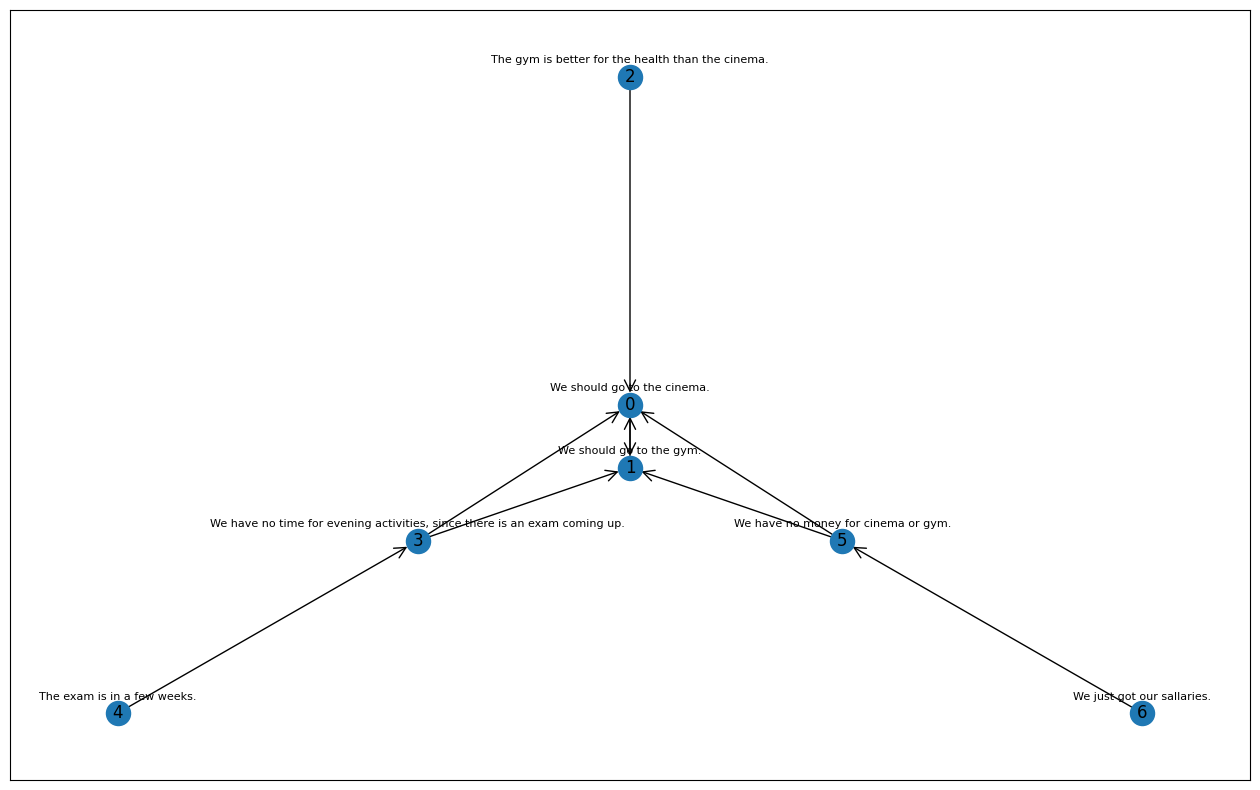

In [111]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(data):
    # Initialize a directed graph
    G = nx.DiGraph()

    # Add nodes to the graph
    G.add_nodes_from(data['Arguments'].keys())

    # Add edges to the graph
    G.add_edges_from(data['Attack Relations'])

    # Define position layout
    pos = nx.spectral_layout(G)

    # Create a figure with a specific size (width, height)
    plt.figure(figsize=(16, 10))

    # Draw the nodes
    nx.draw_networkx_nodes(G, pos)

    # Draw the edges
    nx.draw_networkx_edges(G, pos, edge_color='black', arrowstyle='->', arrowsize=20)

    # Draw the node labels (which are the keys)
    nx.draw_networkx_labels(G, pos, font_size=12)

    # Draw the argument text next to the nodes
    argument_text = {k: f'{v}' for k, v in data['Arguments'].items()}
    pos_higher = {k: (v[0], v[1]+0.04) for k, v in pos.items()}  # positions for argument text
    nx.draw_networkx_labels(G, pos_higher, labels=argument_text, horizontalalignment='center', font_size=8)

    # Adjust the figure's margins
    # plt.subplots_adjust(left=0.1, right=1.5, top=1.5, bottom=0.1)
    plt.savefig('Graph1.png')
    plt.show()

# Call the function with your data
draw_graph(data)



In [106]:
# Game Base
class Game:
    def __init__(self, data, claimed_argument):
        self.data = data
        self.claimed_argument = claimed_argument
        self.proponent_arguments = []
        self.opponent_arguments = []

    def proponent_turn(self):
        if not self.proponent_arguments:
            argument = self.claimed_argument
        else:
            # Find an argument that attacks the opponent's last argument
            for relation in self.data['Attack Relations']:
                if relation[1] == self.opponent_arguments[-1]:
                    argument = relation[0]
                    break
            else:
                print("Proponent cannot make a move. Opponent wins!")
                return False

        self.proponent_arguments.append(argument)
        print(f"Proponent's argument: {self.data['Arguments'][argument]}")
        return True

    def opponent_turn(self):
        # Find arguments that attack the proponent's last argument
        options = [relation[0] for relation in self.data['Attack Relations'] if relation[1] == self.proponent_arguments[-1] and relation[0] not in self.opponent_arguments]

        if not options:
            print("Opponent has no choices left. Proponent wins!")
            return False

        print("Opponent's options:")
        for i, option in enumerate(options):
            print(f"{i+1}. {self.data['Arguments'][option]}")

        choice = int(input("Enter the number of your choice: ")) - 1
        argument = options[choice]

        self.opponent_arguments.append(argument)
        print(f"Opponent's argument: {self.data['Arguments'][argument]}")
        return True

    def play(self):
        while True:
            if not self.proponent_turn():
                break
            if not self.opponent_turn():
                break


In [107]:
game = Game(data, '0')  # Replace '0' with the claimed argument
game.play()

Proponent's argument: We should go to the cinema.
Opponent's options:
1. We should go to the gym.
2. The gym is better for the health than the cinema.
3. We have no time for evening activities, since there is an exam coming up.
4. We have no money for cinema or gym.


Enter the number of your choice:  1


Opponent's argument: We should go to the gym.
Proponent's argument: We should go to the cinema.
Opponent's options:
1. The gym is better for the health than the cinema.
2. We have no time for evening activities, since there is an exam coming up.
3. We have no money for cinema or gym.


Enter the number of your choice:  1


Opponent's argument: The gym is better for the health than the cinema.
Proponent cannot make a move. Opponent wins!


In [39]:
class Game:
    def __init__(self, data, claimed_argument, verbose=False, show_graph=True):
        self.data = data
        self.claimed_argument = claimed_argument
        self.proponent_arguments = []
        self.opponent_arguments = []
        self.verbose = verbose
        self.show_graph = show_graph

    def draw_graph(self):
        if not self.show_graph:
            return

        G = nx.DiGraph()
        G.add_nodes_from(self.data['Arguments'].keys())
        G.add_edges_from(self.data['Attack Relations'])
        pos = nx.spectral_layout(G)
        plt.figure(figsize=(16, 10))
        nx.draw_networkx_nodes(G, pos, nodelist=self.proponent_arguments, node_color='blue')
        nx.draw_networkx_nodes(G, pos, nodelist=self.opponent_arguments, node_color='red')
        nx.draw_networkx_edges(G, pos, edge_color='black', arrowstyle='->', arrowsize=20)
        nx.draw_networkx_labels(G, pos, font_size=12)
        argument_text = {k: f'{v}' for k, v in self.data['Arguments'].items()}
        pos_higher = {k: (v[0], v[1]+0.04) for k, v in pos.items()}
        nx.draw_networkx_labels(G, pos_higher, labels=argument_text, horizontalalignment='center', font_size=8)
        plt.show()

    def proponent_turn(self):
        if not self.proponent_arguments:
            argument = self.claimed_argument
        else:
            # Find an argument that attacks the opponent's last argument and has not been used by the proponent
            for relation in self.data['Attack Relations']:
                if relation[1] == self.opponent_arguments[-1] and relation[0] not in self.proponent_arguments:
                    argument = relation[0]
                    break
            else:
                print("Proponent cannot make a move. Opponent wins!")
                return False

        self.proponent_arguments.append(argument)
        print(f"Proponent's argument: {self.data['Arguments'][argument]}")
        self.draw_graph()
        if self.verbose:
            print("Game state:", self.__dict__)
        return True

    def opponent_turn(self):
        options = [relation[0] for relation in self.data['Attack Relations'] if relation[1] == self.proponent_arguments[-1] and relation[0] not in self.opponent_arguments]

        if not options:
            print("Opponent has no choices left. Proponent wins!")
            return False

        print("Opponent's options:")
        for i, option in enumerate(options):
            print(f"{i+1}. {self.data['Arguments'][option]}")

        while True:
            try:
                choice = int(input("Enter the number of your choice: ")) - 1
                if choice < 0 or choice >= len(options):
                    raise ValueError
                break
            except ValueError:
                print("Invalid input. Please enter a number corresponding to one of the options.")

        argument = options[choice]

        self.opponent_arguments.append(argument)
        print(f"Opponent's argument: {self.data['Arguments'][argument]}")
        # self.draw_graph()
        if self.verbose:
            print("Game state:", self.__dict__)
        return True

    def play(self):
        while True:
            print("Proponent's turn...")
            if not self.proponent_turn():
                break
            print("Opponent's turn...")
            if not self.opponent_turn():
                break

Proponent's turn...
Proponent's argument: We should go to the cinema.


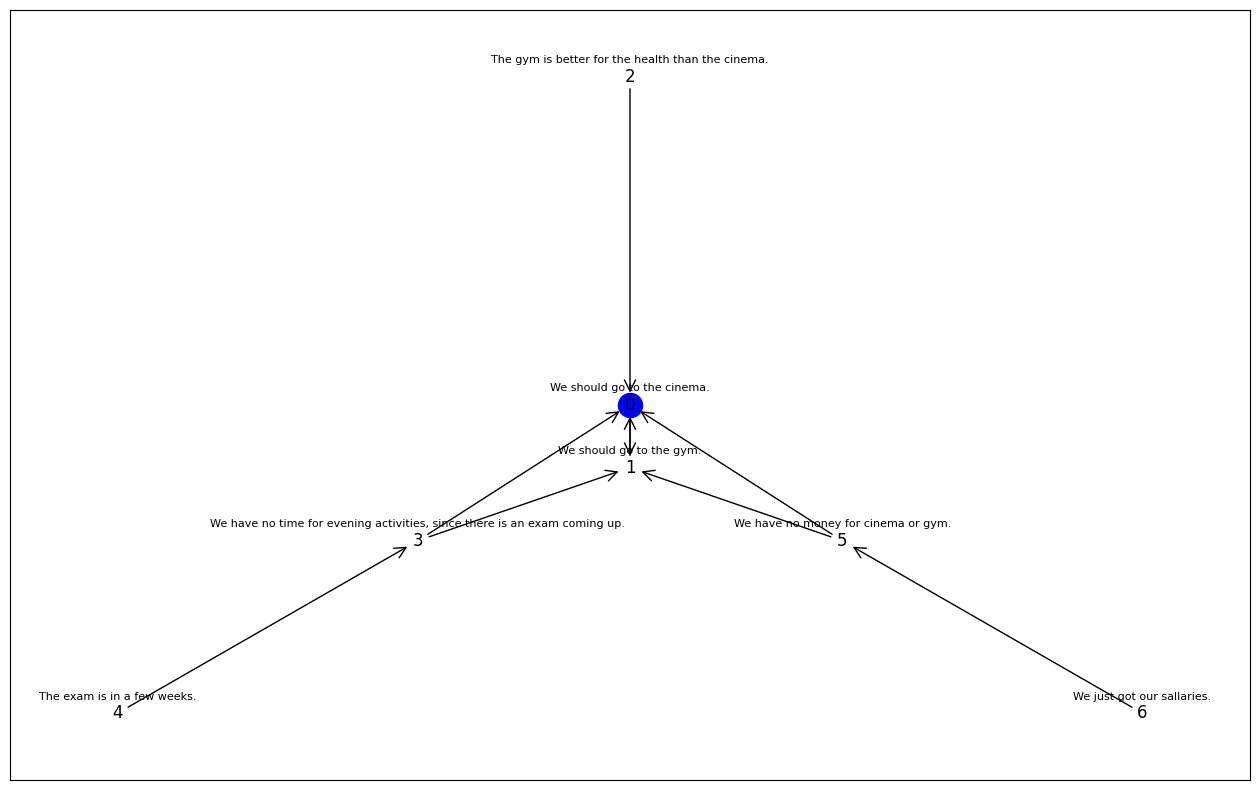

Opponent's turn...
Opponent's options:
1. We should go to the gym.
2. The gym is better for the health than the cinema.
3. We have no time for evening activities, since there is an exam coming up.
4. We have no money for cinema or gym.


Enter the number of your choice:  7


Invalid input. Please enter a number corresponding to one of the options.


Enter the number of your choice:  1


Opponent's argument: We should go to the gym.
Proponent's turn...
Proponent's argument: We have no time for evening activities, since there is an exam coming up.


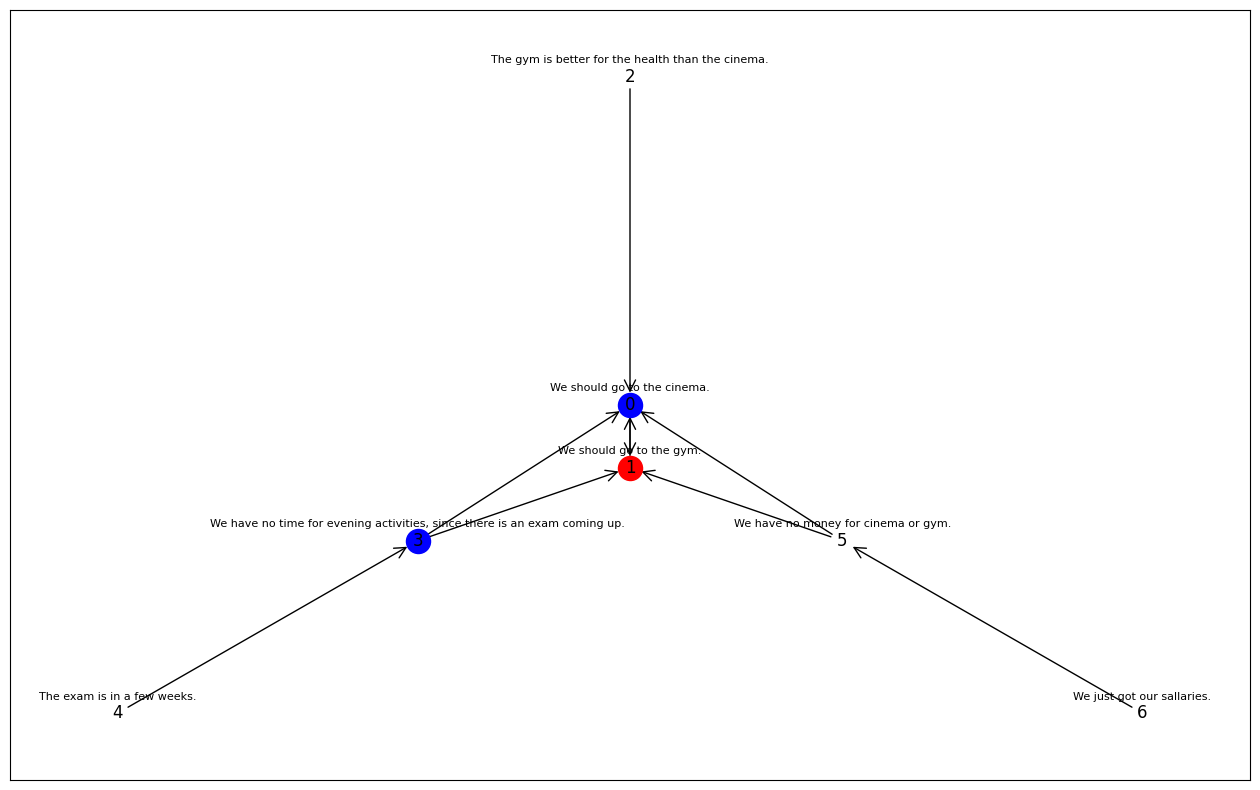

Opponent's turn...
Opponent's options:
1. The exam is in a few weeks.


Enter the number of your choice:  1


Opponent's argument: The exam is in a few weeks.
Proponent's turn...
Proponent cannot make a move. Opponent wins!


In [41]:
game = Game(data, '0', verbose=False, show_graph=True)  # Replace '0' with the claimed argument
game.play()

In [45]:
import networkx as nx
import matplotlib.pyplot as plt

class Game:
    def __init__(self, data, claimed_argument, verbose=False, show_graph=True):
        self.data = data
        self.claimed_argument = claimed_argument
        self.proponent_arguments = []
        self.opponent_arguments = []
        self.verbose = verbose
        self.show_graph = show_graph

    def draw_graph(self):
        if not self.show_graph:
            return

        G = nx.DiGraph()
        G.add_nodes_from(self.data['Arguments'].keys())
        G.add_edges_from(self.data['Attack Relations'])
        pos = nx.spectral_layout(G)
        plt.figure(figsize=(16, 10))
        nx.draw_networkx_nodes(G, pos, nodelist=self.proponent_arguments, node_color='blue')
        nx.draw_networkx_nodes(G, pos, nodelist=self.opponent_arguments, node_color='red')
        nx.draw_networkx_edges(G, pos, edge_color='black', arrowstyle='->', arrowsize=20)
        nx.draw_networkx_labels(G, pos, font_size=12)
        argument_text = {k: f'{v}' for k, v in self.data['Arguments'].items()}
        pos_higher = {k: (v[0], v[1]+0.04) for k, v in pos.items()}
        nx.draw_networkx_labels(G, pos_higher, labels=argument_text, horizontalalignment='center', font_size=8)
        plt.show()

    def proponent_turn(self):
        if not self.proponent_arguments:
            argument = self.claimed_argument
        else:
            # Find an argument that attacks the opponent's last argument and has not been used by the proponent
            for relation in self.data['Attack Relations']:
                if relation[1] == self.opponent_arguments[-1] and relation[0] not in self.proponent_arguments:
                    argument = relation[0]
                    break
            else:
                print("Proponent cannot make a move. Opponent wins!")
                return False

        self.proponent_arguments.append(argument)
        print(f"Proponent's argument: {self.data['Arguments'][argument]}")
        self.draw_graph()
        if self.verbose:
            print("Game state:", self.__dict__)
        return True

    def opponent_turn(self):
        options = [relation[0] for relation in self.data['Attack Relations'] if relation[1] == self.proponent_arguments[-1] and relation[0] not in self.opponent_arguments]

        if not options:
            print("Opponent has no choices left. Proponent wins!")
            return False

        print("Opponent's options:")
        for i, option in enumerate(options):
            print(f"{i+1}. {self.data['Arguments'][option]}")

        while True:
            try:
                choice = int(input("Enter the number of your choice: ")) - 1
                if choice < 0 or choice >= len(options):
                    raise ValueError
                break
            except ValueError:
                print("Invalid input. Please enter a number corresponding to one of the options.")

        argument = options[choice]

        self.opponent_arguments.append(argument)
        print(f"Opponent's argument: {self.data['Arguments'][argument]}")
        # self.draw_graph()
        if self.verbose:
            print("Game state:", self.__dict__)
        return True

    def play(self):
        while True:
            print("Proponent's turn...")
            if not self.proponent_turn():
                break
            print("Opponent's turn...")
            if not self.opponent_turn():
                break


In [46]:
game = Game(data, '0', verbose=False, show_graph=False)  # Replace '0' with the claimed argument
game.play()

Proponent's turn...
Proponent's argument: We should go to the cinema.
Opponent's turn...
Opponent's options:
1. We should go to the gym.
2. The gym is better for the health than the cinema.
3. We have no time for evening activities, since there is an exam coming up.
4. We have no money for cinema or gym.


Enter the number of your choice:  1


Opponent's argument: We should go to the gym.
Proponent's turn...
Proponent's argument: We have no time for evening activities, since there is an exam coming up.
Opponent's turn...
Opponent's options:
1. The exam is in a few weeks.


Enter the number of your choice:  2


Invalid input. Please enter a number corresponding to one of the options.


Enter the number of your choice:  3


Invalid input. Please enter a number corresponding to one of the options.


Enter the number of your choice:  1


Opponent's argument: The exam is in a few weeks.
Proponent's turn...
Proponent cannot make a move. Opponent wins!


Proponent's turn...
Proponent's argument: We should go to the cinema.


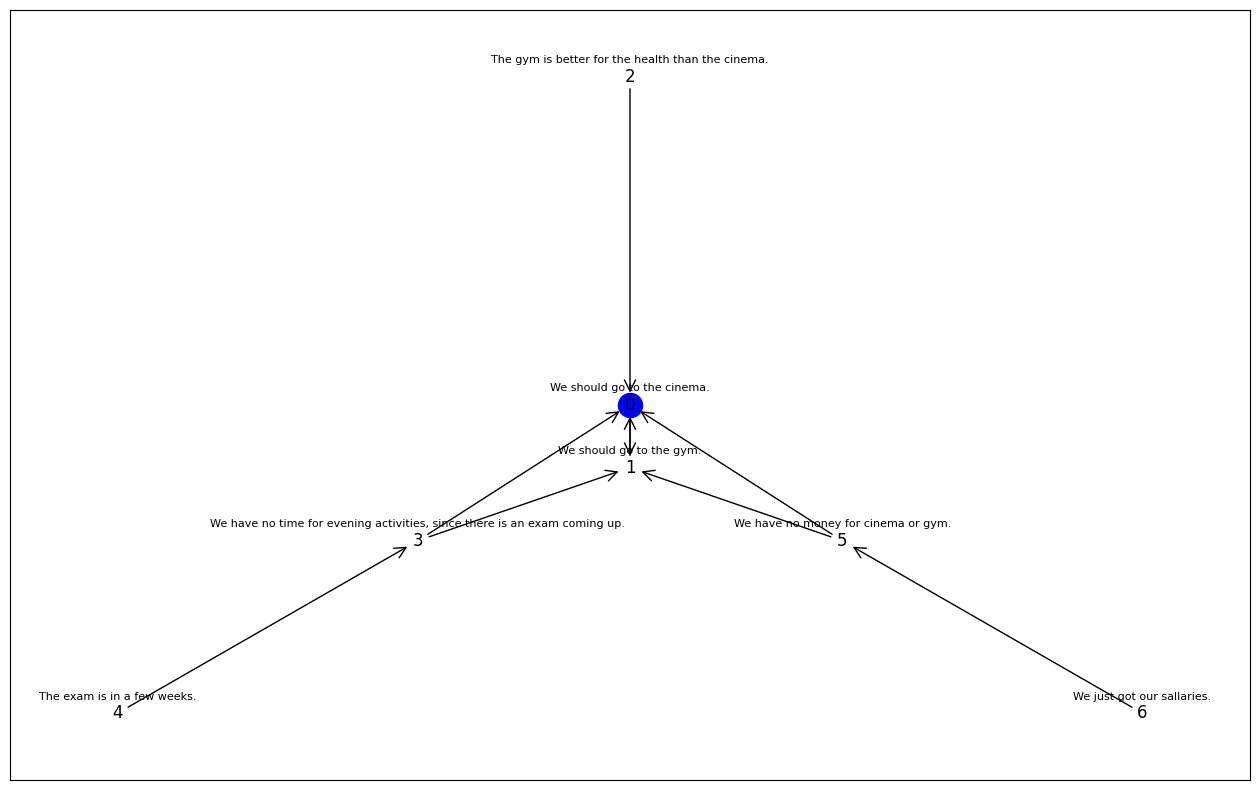

Opponent's turn...
Opponent's options:
1. We should go to the gym.
2. The gym is better for the health than the cinema.
3. We have no time for evening activities, since there is an exam coming up.
4. We have no money for cinema or gym.


Enter the number of your choice:  1


Opponent's argument: We should go to the gym.
Proponent's turn...
Proponent's argument: We have no time for evening activities, since there is an exam coming up.


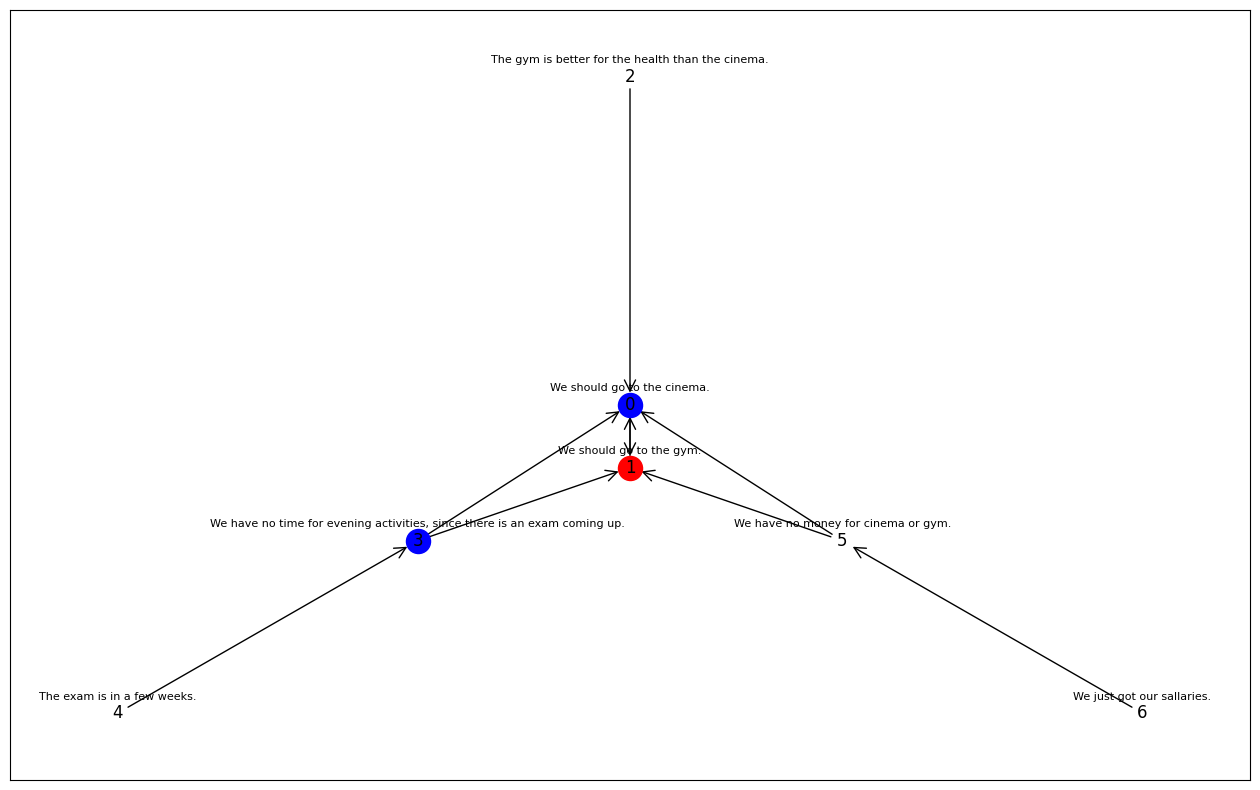

Opponent's turn...
Opponent's options:
1. The exam is in a few weeks.


Enter the number of your choice:  1


Opponent's argument: The exam is in a few weeks.
Proponent's turn...
Proponent cannot make a move. Opponent wins!


In [47]:
game = Game(data, '0', verbose=False, show_graph=True)  # Replace '0' with the claimed argument
game.play()